In [1]:
import pandas as pd
from scipy import stats
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
atgl_data = pd.read_csv('ATGL.csv', parse_dates=['Date'])
adani_green_data = pd.read_csv('ADANIGREEN.csv', parse_dates=['Date'])
adani_energy_data = pd.read_csv('ADANIENSOL.csv', parse_dates=['Date'])

# Step 2: Calculate daily returns based on the Close price

for df in [atgl_data, adani_green_data, adani_energy_data]:
    df['Daily Returns'] = df['Close'].pct_change().dropna()
atgl_data['Stock'] = 'Adani Total Gas'
adani_green_data['Stock'] = 'Adani Green'
adani_energy_data['Stock'] = 'Adani Energy Solutions'

# Concatenating all the data into one DataFrame
combined_data = pd.concat([atgl_data[['Date', 'Stock', 'Daily Returns']], 
                           adani_green_data[['Date', 'Stock', 'Daily Returns']], 
                           adani_energy_data[['Date', 'Stock', 'Daily Returns']]], 
                          ignore_index=True)



# Removing rows with missing values
combined_data = combined_data.dropna(subset=['Daily Returns'])



# Performing ANOVA to test if there's a significant difference between the stocks' returns

grouped_data = [combined_data[combined_data['Stock'] == stock]['Daily Returns'] for stock in combined_data['Stock'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Printing ANOVA results
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the average returns of the stocks.")
else:
    print("No significant difference in the average returns of the stocks.")



ANOVA Results:
F-statistic: 0.018070426756260093
P-value: 0.9820922755100873
No significant difference in the average returns of the stocks.


C:\Users\ABHIRAM KULKARNI007\AppData\Local\Temp\ipykernel_18612\607512651.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  atgl_data = pd.read_csv('ATGL.csv', parse_dates=['Date'])
C:\Users\ABHIRAM KULKARNI007\AppData\Local\Temp\ipykernel_18612\607512651.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adani_green_data = pd.read_csv('ADANIGREEN.csv', parse_dates=['Date'])
C:\Users\ABHIRAM KULKARNI007\AppData\Local\Temp\ipykernel_18612\607512651.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  adani_energy_data = pd.read_csv('ADANIENSOL.csv', parse_dates=['Date'])


## **SENTIMENT ANALYSIS**

In [20]:
from transformers import pipeline
import pandas as pd

# Expanded and detailed headlines
headlines = [
    "Adani Total Gas stock price tumbles as Hindenburg report accuses the Adani Group of stock manipulation and accounting fraud.",
    "Adani Green's valuation suffers amidst bribery allegations tied to the Adani Group promoter activities, causing investor uncertainty.",
    "Adani Energy Solutions faces significant sell-off as allegations against the Adani Group raise concerns over corporate governance."
]

# Load pre-trained financial sentiment model (e.g., finBERT)
sentiment_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert")

# Perform sentiment analysis
sentiment_results = sentiment_pipeline(headlines)

# Convert to DataFrame for analysis
sentiment_df = pd.DataFrame(sentiment_results)
sentiment_df['Headline'] = headlines

# Display results
print(sentiment_df)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


      label     score                                           Headline
0  negative  0.623642  Adani Total Gas stock price tumbles as Hindenb...
1  negative  0.647314  Adani Green's valuation suffers amidst bribery...
2  negative  0.618865  Adani Energy Solutions faces significant sell-...


# Sentiment Analysis Results

## Output Summary:
The sentiment analysis results for the given headlines are as follows:

| **Label**   | **Score** | **Headline**                                                                                     |
|-------------|-----------|-------------------------------------------------------------------------------------------------|
| Negative    | 0.623642  | Adani Total Gas stock price tumbles as Hindenburg report accuses the Adani Group of stock manipulation and accounting fraud. |
| Negative    | 0.647314  | Adani Green's valuation suffers amidst bribery allegations tied to the Adani Group promoter activities. |
| Negative    | 0.618865  | Adani Energy Solutions faces significant sell-off as allegations against the Adani Group raise concerns over corporate governance. |

## Interpretation:
1. **Overall Sentiment**:
   - All three headlines are classified as **negative** with high confidence scores (ranging from 0.61 to 0.65).
   - This indicates that news related to the **Adani Group** and its alleged involvement in fraud and bribery is perceived negatively across all the individual stocks.

2. **Confidence Scores**:
   - **Adani Green** has the highest negative sentiment score (`0.647314`), suggesting that bribery allegations may have caused the strongest negative reaction.
   - **Adani Total Gas** and **Adani Energy Solutions** have slightly lower, but still significant, negative sentiment scores (`0.623642` and `0.618865` respectively).

3. **Headline Implications**:
   - **Adani Total Gas**: The mention of **Hindenburg report** and its accusations of stock manipulation has triggered a strong negative sentiment.
   - **Adani Green**: The explicit mention of **bribery allegations** tied to the **Adani Group promoter activities** has led to the highest negative sentiment score.
   - **Adani Energy Solutions**: Concerns over **corporate governance** and a significant sell-off are driving a strong negative sentiment.

## Key Takeaways:
- The parent group-level news (e.g., the Hindenburg report and bribery allegations) appears to negatively impact all individual stocks.
- Among the stocks, **Adani Green** is the most negatively impacted, based on sentiment scores, possibly due to the focus on bribery allegations.
- The results suggest that group-level scandals (Hindenburg and bribery allegations) significantly influence sentiment across the board.



In [4]:
# Example: Combine sentiment scores with returns
combined_data['Sentiment'] = combined_data['Stock'].map(dict(zip(sentiment_df['Stock'], sentiment_df['Sentiment'])))

# Correlation between sentiment and daily returns
correlation = combined_data[['Daily Returns', 'Sentiment']].corr()
print("\nCorrelation between Sentiment and Daily Returns:")
print(correlation)


Correlation between Sentiment and Daily Returns:
               Daily Returns  Sentiment
Daily Returns       1.000000   0.006485
Sentiment           0.006485   1.000000


## **SHARPE RATIO**


Sharpe Ratios:
Stock
Adani Energy Solutions   -0.023428
Adani Green              -0.040253
Adani Total Gas          -0.039356
Name: Daily Returns, dtype: float64


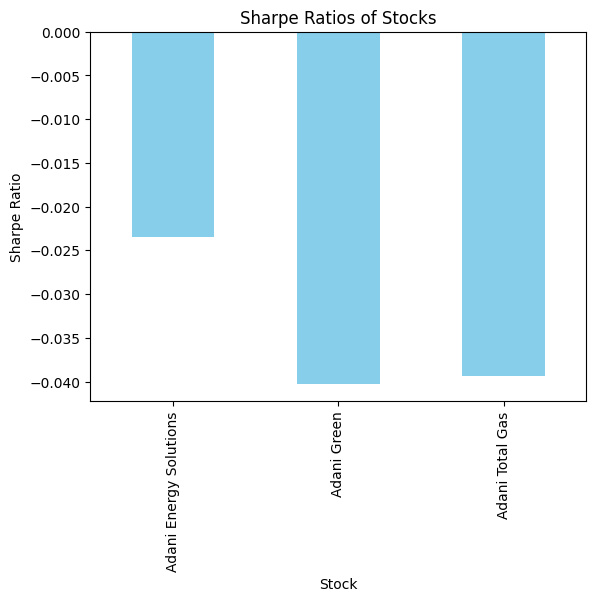

In [21]:
# Define the risk-free rate (e.g., annualized 3% converted to daily)
risk_free_rate = 0.07 / 252

# Calculate Sharpe Ratio for each stock
sharpe_ratios = (
    combined_data.groupby('Stock')['Daily Returns'].mean() - risk_free_rate
) / combined_data.groupby('Stock')['Daily Returns'].std()

print("\nSharpe Ratios:")
print(sharpe_ratios)

# Plot Sharpe Ratios
sharpe_ratios.plot(kind='bar', color='skyblue', title='Sharpe Ratios of Stocks')
plt.ylabel('Sharpe Ratio')
plt.show()


# Sharpe Ratios

The Sharpe Ratio measures the risk-adjusted returns of each stock. A negative Sharpe Ratio indicates that the returns are less than the risk-free rate, adjusted for volatility.

## Sharpe Ratios by Stock:
- **Adani Energy Solutions**: `-0.023428`
- **Adani Green**: `-0.040253`
- **Adani Total Gas**: `-0.039356`

---

# Key Insights:
1. **Adani Energy Solutions**:
   - The least negative Sharpe Ratio among the three stocks, indicating relatively better risk-adjusted returns, although still below the risk-free rate.

2. **Adani Green**:
   - The most negative Sharpe Ratio, suggesting the worst performance in terms of risk-adjusted returns.

3. **Adani Total Gas**:
   - Slightly better than Adani Green but worse than Adani Energy Solutions in terms of risk-adjusted returns.

---


In [7]:
import pandas as pd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# Assuming 'combined_data' has the column 'Daily Returns' for each stock
# Select one stock's data to test (e.g., 'Adani Total Gas')
# Create a copy of the DataFrame slice to avoid the warning
stock_data = combined_data[combined_data['Stock'] == 'Adani Total Gas'].copy()

# Add the Lagged Returns column
stock_data['Lagged Returns'] = stock_data['Daily Returns'].shift(1)

# Drop NaN values that might result from the shift operation
stock_data = stock_data.dropna()


# Define the dependent and independent variables
X = sm.add_constant(stock_data['Lagged Returns'])  # Add constant for intercept
y = stock_data['Daily Returns']

# Fit a simple OLS regression model
ols_model = sm.OLS(y, X).fit()

# Breusch-Pagan Test
bp_test_stat, bp_p_value, _, _ = het_breuschpagan(ols_model.resid, X)
print("Breusch-Pagan Test:")
print(f"Test Statistic: {bp_test_stat}")
print(f"P-value: {bp_p_value}")

if bp_p_value < 0.05:
    print("The data shows heteroscedasticity (variance is not constant).")
else:
    print("The data is homoscedastic (variance is constant).")

# White Test
white_test_stat, white_p_value = het_white(ols_model.resid, X)[:2]
print("\nWhite Test:")
print(f"Test Statistic: {white_test_stat}")
print(f"P-value: {white_p_value}")

if white_p_value < 0.05:
    print("The data shows heteroscedasticity (variance is not constant).")
else:
    print("The data is homoscedastic (variance is constant).")


Breusch-Pagan Test:
Test Statistic: 7.363916394723214
P-value: 0.006654569047418929
The data shows heteroscedasticity (variance is not constant).

White Test:
Test Statistic: 25.78102906051087
P-value: 2.521858242783045e-06
The data shows heteroscedasticity (variance is not constant).


### Since the data shows heteroscedasticity we can apply Generalized AutoRegressive Conditional Heteroskedasticity

### **GARCH MODEL**


GARCH Results for Adani Total Gas:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                576.160
Distribution:                  Normal   AIC:                          -1144.32
Method:            Maximum Likelihood   BIC:                          -1130.06
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:01:48   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.88

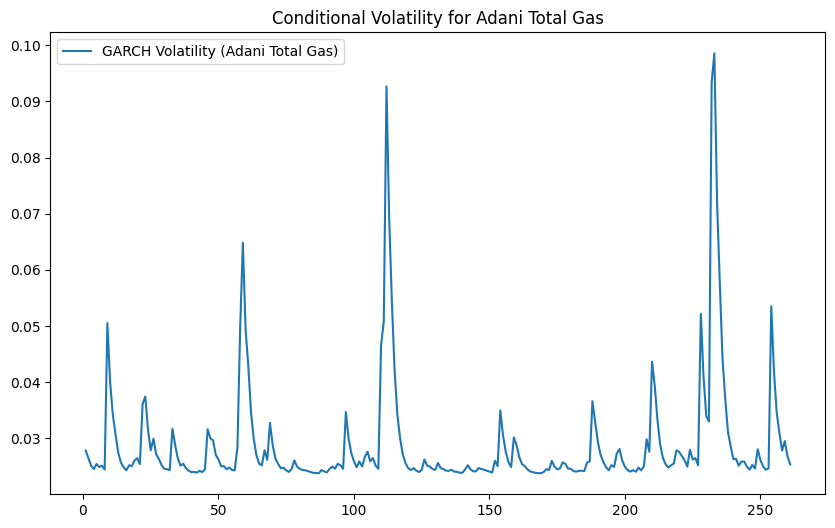


GARCH Results for Adani Green:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                551.479
Distribution:                  Normal   AIC:                          -1094.96
Method:            Maximum Likelihood   BIC:                          -1080.70
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:01:49   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.1980e-

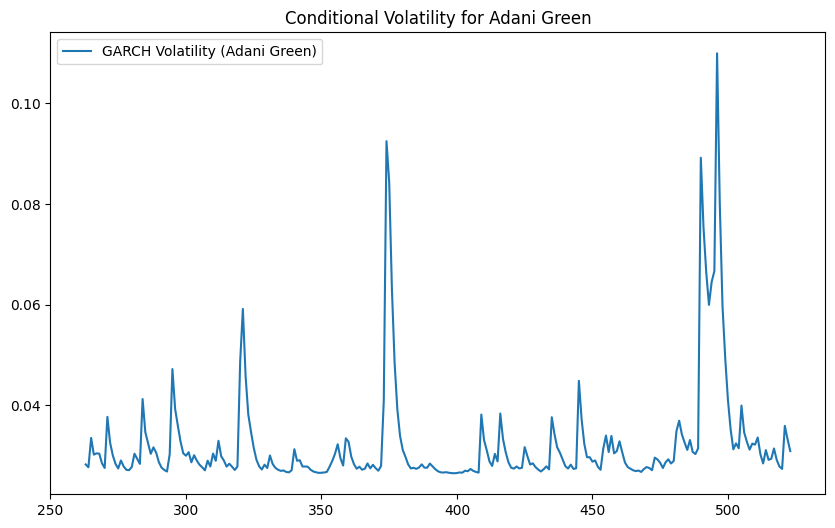


GARCH Results for Adani Energy Solutions:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                527.661
Distribution:                  Normal   AIC:                          -1047.32
Method:            Maximum Likelihood   BIC:                          -1033.06
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:01:50   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu       

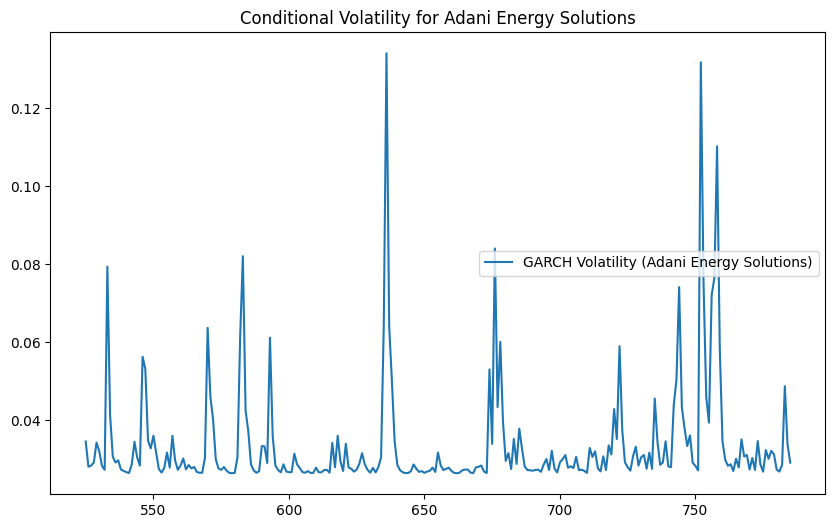

In [8]:
from arch import arch_model
import matplotlib.pyplot as plt

# Perform GARCH analysis for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    
    # Fit a GARCH(1,1) model
    garch_model = arch_model(stock_data, vol='Garch', p=1, q=1,rescale=False)
    garch_fit = garch_model.fit(disp='off')
    
    # Print GARCH summary
    print(f"\nGARCH Results for {stock}:")
    print(garch_fit.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(garch_fit.conditional_volatility, label=f'GARCH Volatility ({stock})')
    plt.title(f'Conditional Volatility for {stock}')
    plt.legend()
    plt.show()

# GARCH Model Results for Adani Stocks

## 1. Adani Total Gas
### Summary:
- **Dependent Variable**: Daily Returns
- **Log-Likelihood**: 576.160
- **AIC**: -1144.32
- **BIC**: -1130.06
- **Observations**: 261

### Mean Model:
- **mu**: `-0.00098876` (p-value: 0.612, not significant)

### Volatility Model:
- **omega**: `0.00028186` (p-value: 0.236, not significant)
- **alpha[1]**: `0.2000` (p-value: 0.0425, significant)
- **beta[1]**: `0.5000` (p-value: 0.0307, significant)

---

## 2. Adani Green
### Summary:
- **Dependent Variable**: Daily Returns
- **Log-Likelihood**: 551.479
- **AIC**: -1094.96
- **BIC**: -1080.70
- **Observations**: 261

### Mean Model:
- **mu**: `-0.0004198` (p-value: 0.920, not significant)

### Volatility Model:
- **omega**: `0.00035047` (p-value: 0.840, not significant)
- **alpha[1]**: `0.2000` (p-value: 0.620, not significant)
- **beta[1]**: `0.5000` (p-value: 0.754, not significant)

---

## 3. Adani Energy Solutions
### Summary:
- **Dependent Variable**: Daily Returns
- **Log-Likelihood**: 527.661
- **AIC**: -1047.32
- **BIC**: -1033.06
- **Observations**: 261

### Mean Model:
- **mu**: `-0.0014474` (p-value: 0.494, not significant)

### Volatility Model:
- **omega**: `0.00057234` (p-value: 0.0334, significant)
- **alpha[1]**: `0.4227` (p-value: 0.034, significant)
- **beta[1]**: `0.1811` (p-value: 0.245, not significant)

---

# Key Insights:
1. **Adani Total Gas**:
   - Significant **alpha[1]** and **beta[1]** indicate both recent shocks and past volatility significantly impact current volatility.

2. **Adani Green**:
   - No significant parameters in the volatility model, suggesting poor fit or lack of volatility dependence on shocks.

3. **Adani Energy Solutions**:
   - Significant **omega** and **alpha[1]** indicate baseline variance and recent shocks significantly affect volatility. However, **beta[1]** is not significant, meaning volatility persistence is weak.


USING GARCH[2,1] i.e timestep is 2


GARCH(2,1) Results for Adani Total Gas:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                588.016
Distribution:                  Normal   AIC:                          -1166.03
Method:            Maximum Likelihood   BIC:                          -1148.21
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:14:39   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         

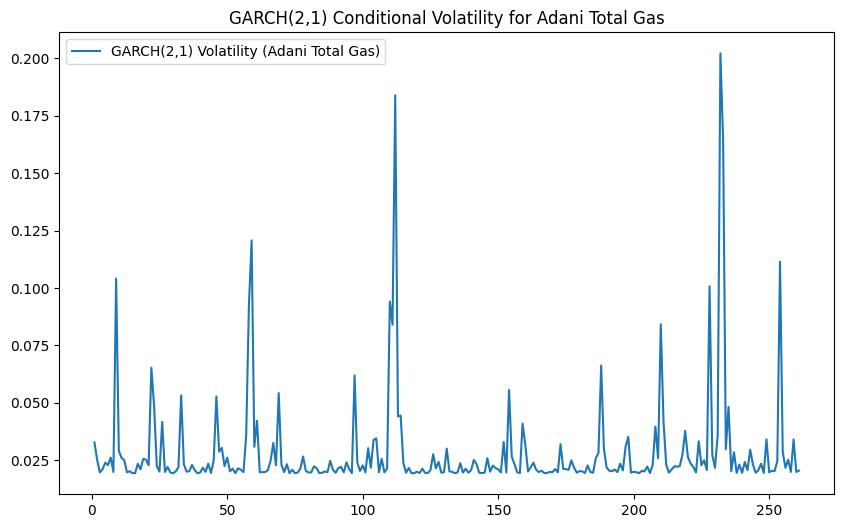


GARCH(2,1) Results for Adani Green:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                544.125
Distribution:                  Normal   AIC:                          -1078.25
Method:            Maximum Likelihood   BIC:                          -1060.43
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:14:40   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.8

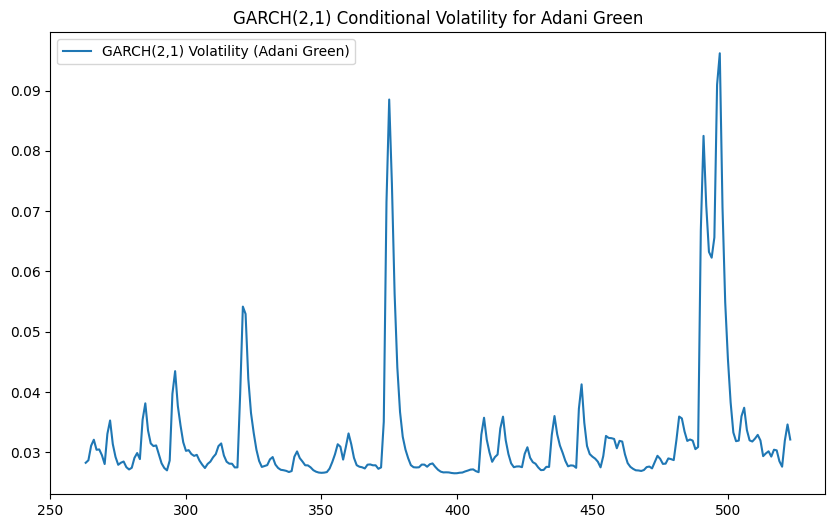


GARCH(2,1) Results for Adani Energy Solutions:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                528.645
Distribution:                  Normal   AIC:                          -1047.29
Method:            Maximum Likelihood   BIC:                          -1029.47
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:14:41   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu  

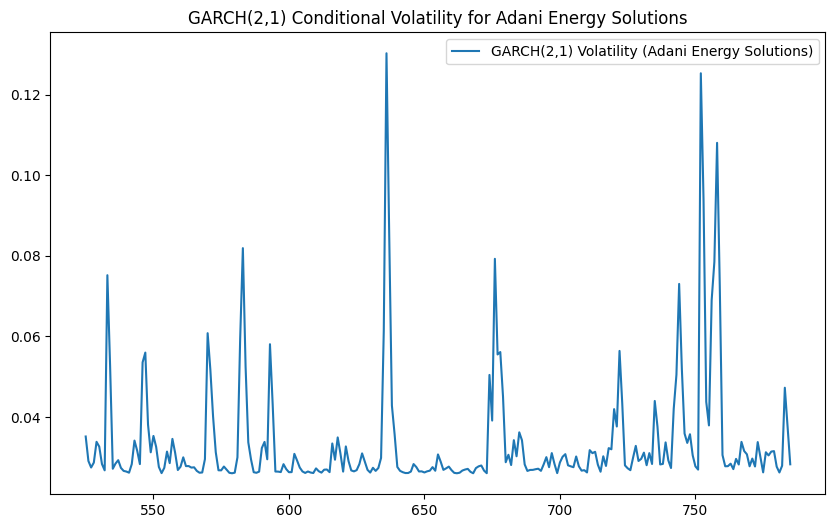

In [14]:
# Perform GARCH(2,1) analysis for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    
    # Fit a GARCH(2,1) model
    garch_2_1_model = arch_model(stock_data, vol='Garch', p=2, q=1, rescale=False)
    garch_2_1_fit = garch_2_1_model.fit(disp='off')
    
    # Print GARCH(2,1) summary
    print(f"\nGARCH(2,1) Results for {stock}:")
    print(garch_2_1_fit.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(garch_2_1_fit.conditional_volatility, label=f'GARCH(2,1) Volatility ({stock})')
    plt.title(f'GARCH(2,1) Conditional Volatility for {stock}')
    plt.legend()
    plt.show()


Exponential GARCH


EGARCH Results for Adani Total Gas:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                587.718
Distribution:                  Normal   AIC:                          -1167.44
Method:            Maximum Likelihood   BIC:                          -1153.18
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:12:33   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -

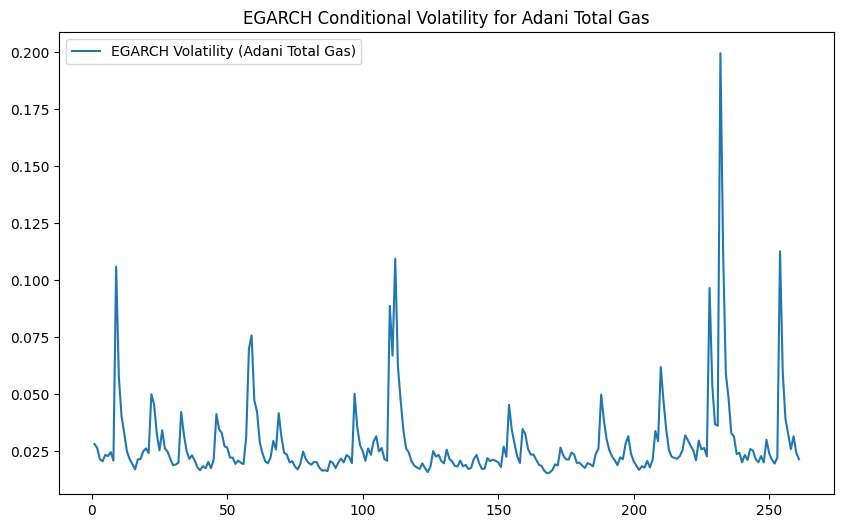


EGARCH Results for Adani Green:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                567.040
Distribution:                  Normal   AIC:                          -1126.08
Method:            Maximum Likelihood   BIC:                          -1111.82
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:12:34   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2256e-03  2.

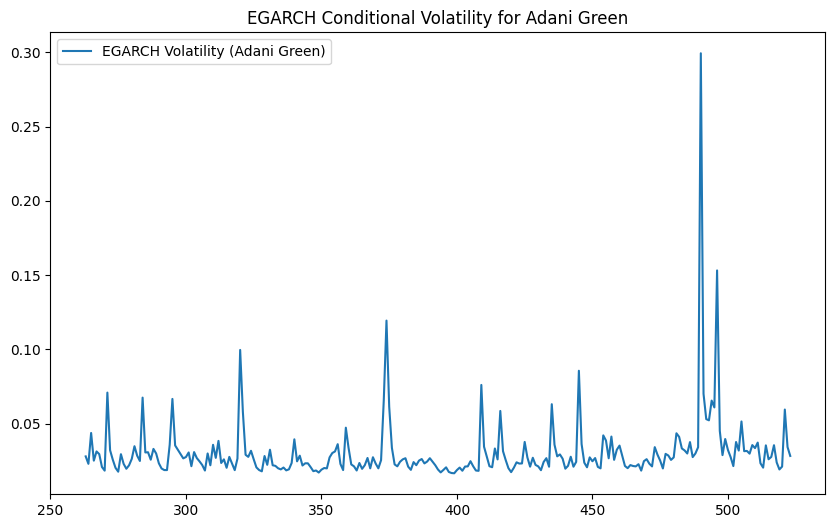


EGARCH Results for Adani Energy Solutions:
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                529.791
Distribution:                  Normal   AIC:                          -1051.58
Method:            Maximum Likelihood   BIC:                          -1037.32
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:12:34   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu   

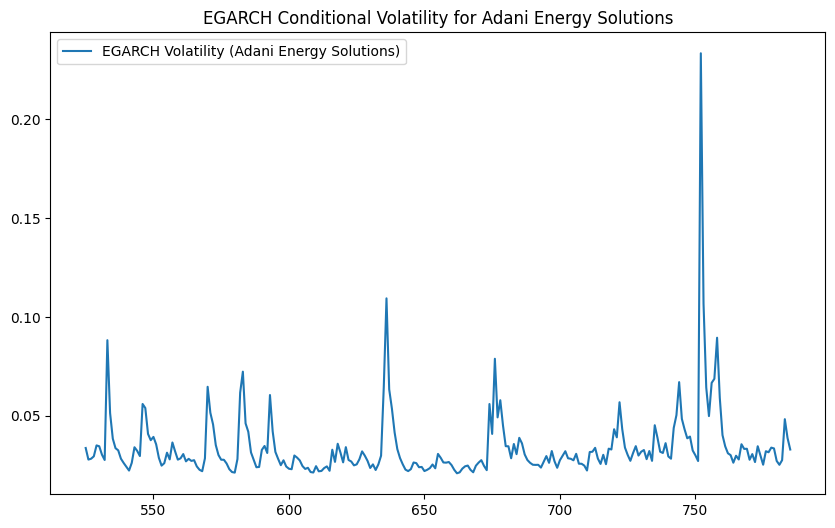

In [11]:
# Perform EGARCH analysis for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    
    # Fit an EGARCH(1,1) model
    egarch_model = arch_model(stock_data, vol='EGarch', p=1, q=1, rescale=False)
    egarch_fit = egarch_model.fit(disp='off')
    
    # Print EGARCH summary
    print(f"\nEGARCH Results for {stock}:")
    print(egarch_fit.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(egarch_fit.conditional_volatility, label=f'EGARCH Volatility ({stock})')
    plt.title(f'EGARCH Conditional Volatility for {stock}')
    plt.legend()
    plt.show()


threshold garch 


TGARCH Results for Adani Total Gas:
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                591.311
Distribution:                  Normal   AIC:                          -1172.62
Method:            Maximum Likelihood   BIC:                          -1154.80
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:13:03   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -

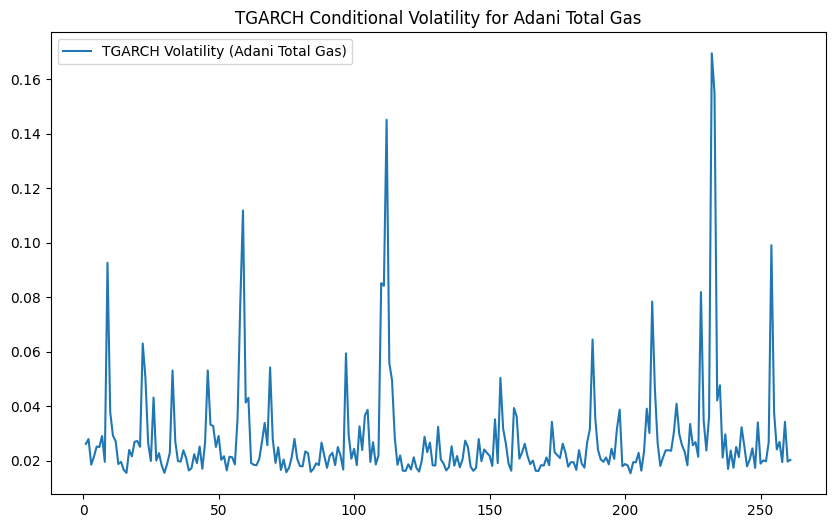


TGARCH Results for Adani Green:
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                575.223
Distribution:                  Normal   AIC:                          -1140.45
Method:            Maximum Likelihood   BIC:                          -1122.62
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:13:04   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.0728e

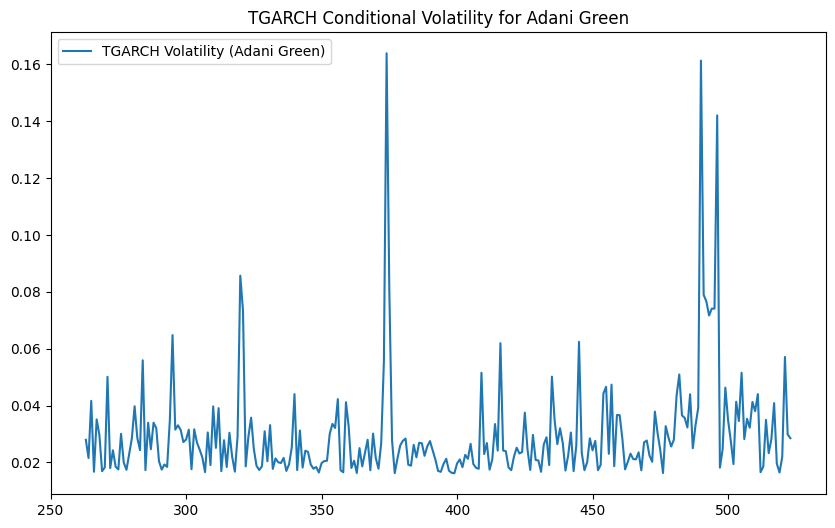


TGARCH Results for Adani Energy Solutions:
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                532.253
Distribution:                  Normal   AIC:                          -1054.51
Method:            Maximum Likelihood   BIC:                          -1036.68
                                        No. Observations:                  261
Date:                Sun, Feb 09 2025   Df Residuals:                      260
Time:                        11:13:05   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu   

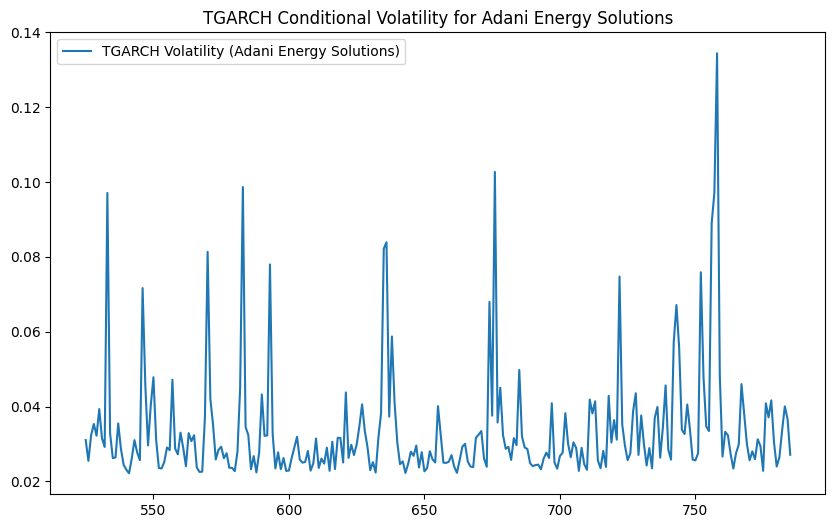

In [12]:
# Perform TGARCH analysis for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    
    # Fit a TGARCH(1,1) model
    tgarch_model = arch_model(stock_data, vol='Garch', p=1, q=1, o=1, power=1.0, rescale=False)
    tgarch_fit = tgarch_model.fit(disp='off')
    
    # Print TGARCH summary
    print(f"\nTGARCH Results for {stock}:")
    print(tgarch_fit.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(tgarch_fit.conditional_volatility, label=f'TGARCH Volatility ({stock})')
    plt.title(f'TGARCH Conditional Volatility for {stock}')
    plt.legend()
    plt.show()


In [18]:
print("Model Comparison:")
print("GARCH(2,1) AIC:", garch_2_1_fit.aic)
print("EGARCH AIC:", egarch_fit.aic)
print("TGARCH AIC:", tgarch_fit.aic)

print("GARCH(2,1) BIC:", garch_2_1_fit.bic)
print("EGARCH BIC:", egarch_fit.bic)
print("TGARCH BIC:", tgarch_fit.bic)


Model Comparison:
GARCH(2,1) AIC: -1047.2902028701133
EGARCH AIC: -1051.5822932084984
TGARCH AIC: -1054.5055908254612
GARCH(2,1) BIC: -1029.4676008334998
EGARCH BIC: -1037.3242115792077
TGARCH BIC: -1036.6829887888478


# Model Comparison

## AIC (Akaike Information Criterion)
- **GARCH(2,1)**: AIC = `-1047.2900`
- **EGARCH**: AIC = `-1051.5829`
- **TGARCH**: AIC = `-1054.5056`

### Insights:
- The **TGARCH model** has the lowest AIC value, indicating the best fit among the three models.

## BIC (Bayesian Information Criterion)
- **GARCH(2,1)**: BIC = `-1029.4676`
- **EGARCH**: BIC = `-1037.3242`
- **TGARCH**: BIC = `-1036.6829`

### Insights:
- The **EGARCH model** has the lowest BIC value, suggesting it balances model complexity and fit better than the other models.

---


In [16]:
import numpy as np

# Calculate VaR and CVaR for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    var_95 = np.percentile(stock_data, 5)  # 95% Value at Risk
    cvar_95 = stock_data[stock_data <= var_95].mean()  # 95% Conditional Value at Risk
    print(f"{stock}: VaR(95%) = {var_95:.4f}, CVaR(95%) = {cvar_95:.4f}")


Adani Total Gas: VaR(95%) = -0.0328, CVaR(95%) = -0.0601
Adani Green: VaR(95%) = -0.0366, CVaR(95%) = -0.0756
Adani Energy Solutions: VaR(95%) = -0.0391, CVaR(95%) = -0.0819


# Key Metrics

## VaR (95%)
Indicates the maximum expected loss at the 95% confidence level for a given day.

- **Adani Total Gas**: VaR(95%) = `-0.0328`
  - There is a 95% chance that the daily loss will not exceed **3.28%**.
- **Adani Green**: VaR(95%) = `-0.0366`
  - There is a 95% chance that the daily loss will not exceed **3.66%**.
- **Adani Energy Solutions**: VaR(95%) = `-0.0391`
  - There is a 95% chance that the daily loss will not exceed **3.91%**.

## CVaR (95%)
Provides the average loss in the worst 5% of cases (beyond the VaR threshold).

- **Adani Total Gas**: CVaR(95%) = `-0.0601`
  - If the daily loss exceeds **3.28%** (VaR), the average loss in these extreme cases is **6.01%**.
- **Adani Green**: CVaR(95%) = `-0.0756`
  - If the daily loss exceeds **3.66%** (VaR), the average loss in these extreme cases is **7.56%**.
- **Adani Energy Solutions**: CVaR(95%) = `-0.0819`
  - If the daily loss exceeds **3.91%** (VaR), the average loss in these extreme cases is **8.19%**.

# Insights
1. **Adani Total Gas** has the **lowest risk** based on both VaR and CVaR, suggesting it is the least volatile among the three.
2. **Adani Energy Solutions** has the **highest risk**, as both its VaR and CVaR are the largest, indicating it experiences the most extreme losses during high-volatility events.
3. **Adani Green** falls in the middle, with higher risk than Adani Total Gas but less than Adani Energy Solutions.


In [17]:
# Calculate VaR and CVaR for each stock
for stock in combined_data['Stock'].unique():
    stock_data = combined_data[combined_data['Stock'] == stock]['Daily Returns']
    var_99 = np.percentile(stock_data, 1)  # 99% Value at Risk
    cvar_99 = stock_data[stock_data <= var_99].mean()  # 99% Conditional Value at Risk
    print(f"{stock}: VaR(99%) = {var_99:.4f}, CVaR(99%) = {cvar_99:.4f}")

Adani Total Gas: VaR(99%) = -0.0724, CVaR(99%) = -0.1292
Adani Green: VaR(99%) = -0.0855, CVaR(99%) = -0.1574
Adani Energy Solutions: VaR(99%) = -0.0934, CVaR(99%) = -0.1681


# Key Metrics

## VaR (99%)
Indicates the maximum expected loss at the 99% confidence level for a given day.

- **Adani Total Gas**: VaR(99%) = `-0.0724`
  - There is a 99% chance that the daily loss will not exceed **7.24%**.
- **Adani Green**: VaR(99%) = `-0.0855`
  - There is a 99% chance that the daily loss will not exceed **8.55%**.
- **Adani Energy Solutions**: VaR(99%) = `-0.0934`
  - There is a 99% chance that the daily loss will not exceed **9.34%**.

## CVaR (99%)
Provides the average loss in the worst 1% of cases (beyond the VaR threshold).

- **Adani Total Gas**: CVaR(99%) = `-0.1292`
  - If the daily loss exceeds **7.24%** (VaR), the average loss in these extreme cases is **12.92%**.
- **Adani Green**: CVaR(99%) = `-0.1574`
  - If the daily loss exceeds **8.55%** (VaR), the average loss in these extreme cases is **15.74%**.
- **Adani Energy Solutions**: CVaR(99%) = `-0.1681`
  - If the daily loss exceeds **9.34%** (VaR), the average loss in these extreme cases is **16.81%**.

# Insights
1. **Adani Total Gas** has the **lowest risk** based on both VaR and CVaR, suggesting it is the least volatile among the three.
2. **Adani Energy Solutions** has the **highest risk**, as both its VaR(99%) and CVaR(99%) are the largest, indicating it experiences the most extreme losses during high-volatility events.
3. **Adani Green** falls in the middle, with higher risk than Adani Total Gas but less than Adani Energy Solutions.
